# **MÓDULO 26 -Aprofundamento de Analytics**
##  Projeto Final

Bem-vindos ao Projeto de Dashboard de E-commerce! Este projeto é uma oportunidade para vocês aplicarem habilidades essenciais de análise de dados em um cenário prático e realista. Vocês irão trabalhar com um conjunto de dados de transações de clientes de uma loja virtual, distribuídos em duas tabelas distintas. O objetivo final é construir um dashboard interativo que facilite a visualização e análise das informações relevantes do e-commerce, utilizando ferramentas como Looker Studio ou Power BI.

**Objetivo do Projeto:**

Tratamento de Dados: Realizar a junção (JOIN) de duas tabelas utilizando SQL para consolidar as informações.
Análise de Dados: Exportar os dados resultantes para um arquivo CSV.
Visualização de Dados: Desenvolver um dashboard interativo e informativo para visualização das principais métricas e insights do e-commerce.

**Tabelas Disponibilizadas:**

**Tabela de Transações:** Contém os registros de transações realizadas pelos clientes, incluindo detalhes como ID da transação, valor e outros.


**Tabela de Dados Pessoais:** Contém as informações pessoais dos clientes, como ID do cliente, nome, genero, cidade, etc.

**Chave de Ligação:** As tabelas se relacionam através da coluna ID_CLIENT, que é a chave identificadora dos clientes.

## Etapas do Projeto:

1. Realizar um JOIN SQL nas duas tabelas, unificando as informações através da coluna ID_CLIENT. Você deve justificar a escolha do JOIN (Inner/ Left/ Right ou Full).

2. Exportar os dados consolidados resultantes do JOIN para um arquivo CSV.

3. Utilizar Looker Studio ou Power BI para importar o arquivo CSV.

4. Criar visualizações interativas que apresentem métricas importantes, como total de vendas, número de transações, distribuição geográfica dos clientes, perfil demográfico dos clientes, entre outros.

Abaixo temos a configuração do ambiente SQL:

In [1]:
import sqlite3
import pandas as pd
#pd.set_option('display.max_rows', None)       # Mostrar todas as linhas
#pd.set_option('display.max_columns', None)   # Mostrar todas as colunas
#pd.set_option('display.width', None)         # Ajustar automaticamente ao tamanho do terminal


In [3]:
# Leitura dos arquivos
df_transacoes = pd.read_csv("TB_TRANSACOES_PROJETO_ECOMM.csv", delimiter=';')
df_clientes = pd.read_csv("TB_CLIENTES_PROJETO_ECOMM.csv", delimiter=';')

In [4]:
conn = sqlite3.connect('projeto.db') #abertura do banco de dados.
df_transacoes.to_sql('tb_transacoes', conn, index=False, if_exists='replace')
df_clientes.to_sql('tb_clientes', conn, index=False, if_exists='replace');

In [5]:
# Função para executar consultas SQL e retornar o resultado como um DataFrame
def run_query(query):
    return pd.read_sql_query(query, conn)

## 1. Inner Join

In [6]:
query = """
Select
A.id_client,
A.First_name,A.Gender,A.job_title,
B.category,B.Price,B.'Card type',A.state_name
from tb_clientes as A
inner join tb_transacoes as B
on A.id_client=B.id_client
"""
df = run_query(query)
print(df.shape)

(296, 8)


## 1.1 Descrição das Tabelas e Base de Dados e justificativa

A base de dados criada para este projeto relaciona informações de tabelas de cadastral de clientes e registro de transações financeiras. Estas estão organizadas:

* **tb_clientes (175 registros):** Contém dados cadastrais dos clientes\
**Principais campos**: id_clientes (chave primária), state_name (UF), first_name, Gender (gênero), Job_title (cargo profissional)

* **tb_transacoes (367 registros):** Armazena operações financeiras realizadas\
**Principais campos**: id_clientes (chave estrangeira), category (categoria), price (valor), Card Type (tipo de cartão)

Para esta atividade, utilizamos o **INNER JOIN** por garantir precisão e consistência nos dados, exibindo apenas informações completas e validadas. Assim, apenas registros que tenham correspondência exata entre as tabelas são usados nas análises, eliminando transações sem clientes cadastrados, o que evita distorções métricas ou, ainda, a necessidade de uma preparação mais extensa dos dados antes da construção do dashboard.

De fato, o INNER JOIN mostra apenas o que aconteceu, mas não o que deixou de acontecer. Isso pode mascarar informações ou até indicar falhas no sistema. Por outro lado, o FULL JOIN se apresentaria como a escolha mais adequada para a construção deste dashboard, por proporcionar uma visão completa e ininterrupta de todas as entidades do sistema, garantindo que nenhuma informação seja perdida. No entanto, em muitos casos — como neste conjunto de dados — sua aplicação requereria um pré-tratamento da base, com o objetivo de vincular ou classificar os dados nulos.

Dessa forma, como buscamos avaliar apenas métricas operacionais, o INNER JOIN mostra-se suficiente. A tabela final consta com 8 colunas e 296 registros.


## 2. Exportando para  CSV

In [6]:
df.to_csv('dados_ecommerce_final_inner.csv', index=False)

## 3. Dashboard
Dashboard de Análise de Clientes e Transações

O painel contém as seguintes visualizações:

1. Contagem Geográfica
Mapa interativo mostrando a distribuição de clientes e transações por estado.

2. Contagem por Gênero
Gráfico de barras exibindo a constagem total/regional

3. Top 3 Profissões e Categorias
Barras destacando as profissões mais frequentes e as categorias de produtos mais consumidas.

4. Tabela de Transações por Estado
Dados agregados com totais e médias de transações organizadas por Estado

5. Relação entre Gênero e Categoria Consumida
Gráfico ligação cruzando gênero dos clientes com preferências de consumo.

link: https://lookerstudio.google.com/reporting/0a7e5c26-71cc-458f-b930-c5f81aaca56e


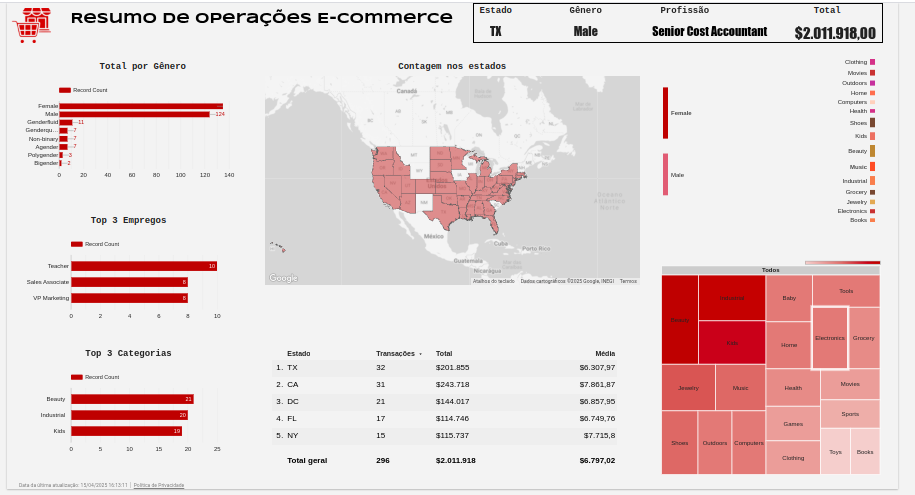